# EE0005 Group Project

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
sb.set()


    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [51]:
heartdata = pd.read_csv('cardio_train.csv')
heartdata.head(n = 10000)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14249,20427,1,166,65.0,130,80,1,1,0,0,0,0
9996,14251,18214,1,160,93.0,140,80,2,1,0,0,1,1
9997,14252,14665,1,158,66.0,130,90,2,2,0,0,1,0
9998,14253,18328,1,168,70.0,160,80,3,1,0,0,1,1


In [52]:
heartdata.shape

(70000, 13)

In [53]:
heartdata.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [54]:
heartdata['years'] = (heartdata['age']/365).round().astype('int')
years = pd.DataFrame(heartdata['years'])
years.head()

,years
0,50
1,55
2,52
3,48
4,48


In [55]:
height = pd.DataFrame(heartdata['height'])
height.head()

,height
0,168
1,156
2,165
3,169
4,156


In [56]:
weight = pd.DataFrame(heartdata['weight'])
weight.head()

,weight
0,62.0
1,85.0
2,64.0
3,82.0
4,56.0


In [57]:
heartdata['bmi'] = heartdata['weight'] / (heartdata['height']/100)**2
bmi = pd.DataFrame(heartdata['bmi'])
bmi.head()

,bmi
0,21.967120
1,34.927679
2,23.507805
3,28.710479
4,23.011177


MAP is Mean Arterial Pressure

In [58]:
heartdata['MAP'] = ((2 * heartdata['ap_lo'] + heartdata['ap_hi'])/3)
MAP = pd.DataFrame(heartdata['MAP'])
MAP.head()

,MAP
0,90.000000
1,106.666667
2,90.000000
3,116.666667
4,73.333333


In [59]:
newheartdata = heartdata.drop(columns = ['id', 'age'])

In [60]:
newheartdata.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,90.000000
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,106.666667
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,90.000000
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,116.666667
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,73.333333


In [61]:
newheartdata.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686,27.556513,107.359371
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294,6.091511,136.493690
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784,-41.666667
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,93.333333
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.374068,93.333333
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.222222,103.333333
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,298.666667,7400.000000


# Exploratory Analysis

#### Age (in years) vs presence of Cardiovascular disease (M & F)

In [62]:
years = pd.DataFrame(newheartdata['years'])
cardio = pd.DataFrame(newheartdata['cardio'])

In [63]:
years.describe()

,years
count,70000.000000
mean,53.338686
std,6.765294
min,30.000000
25%,48.000000
50%,54.000000
75%,58.000000
max,65.000000


In [64]:
cardio.describe()

,cardio
count,70000.000000
mean,0.499700
std,0.500003
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [65]:
# Create a joint dataframe by concatenating the two variables
age_jointDF = pd.concat([years, cardio], axis = 1).reindex(years.index)
age_jointDF.describe()

,years,cardio
count,70000.000000,70000.000000
mean,53.338686,0.499700
std,6.765294,0.500003
min,30.000000,0.000000
25%,48.000000,0.000000
50%,54.000000,0.000000
75%,58.000000,1.000000
max,65.000000,1.000000


<AxesSubplot:xlabel='cardio', ylabel='years'>

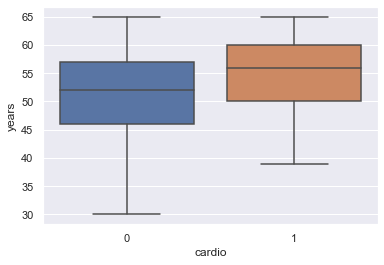

In [66]:
sb.boxplot(y =  age_jointDF['years'], x = age_jointDF['cardio'])

In [67]:
age_jointDF['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

###### Alcohol consumption vs presence of Cardiovascular disease (M & F)

In [68]:
alcoConsump = pd.DataFrame(newheartdata['alco'])

In [69]:
# Create a joint dataframe by concatenating the two variables
alcohol_jointDF = pd.concat([alcoConsump, cardio], axis = 1).reindex(alcoConsump.index)
alcohol_jointDF.describe()

,alco,cardio
count,70000.000000,70000.000000
mean,0.053771,0.499700
std,0.225568,0.500003
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


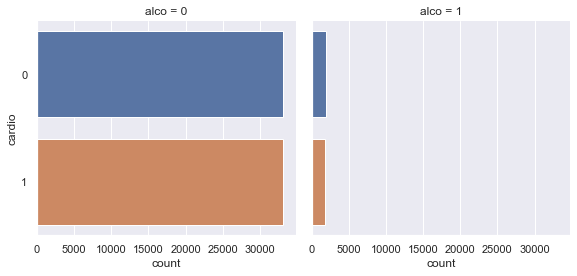

In [70]:
# breakdown of patients who consume alcohol and have cardiovascular disease
sb.catplot(y = 'cardio', data = alcohol_jointDF, col = 'alco', kind = 'count', col_wrap = 3, height = 4)

In [71]:
alcohol_jointDF.query('alco == 0').value_counts()

alco  cardio
0     1         33156
      0         33080
dtype: int64

In [72]:
alcohol_jointDF.query('alco ==1').value_counts()

alco  cardio
1     0         1941
      1         1823
dtype: int64

# Data Visualisation

## Male plots

In [73]:
maleDF = newheartdata[newheartdata['gender'] == 1]
maleDF

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,106.666667
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,90.000000
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,73.333333
5,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,93.333333
6,1,157,93.0,130,80,3,1,0,0,1,0,61,37.729725,96.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54,23.661439,103.333333
69994,1,165,80.0,150,80,1,1,0,0,1,1,58,29.384757,103.333333
69996,1,158,126.0,140,90,2,2,0,0,1,1,62,50.472681,106.666667
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,98.333333


In [74]:
maleDF.drop(maleDF[(maleDF['ap_hi'] > maleDF['ap_hi'].quantile(0.975)) | (maleDF['ap_hi'] < maleDF['ap_hi'].quantile(0.025))].index,inplace=True)
maleDF.drop(maleDF[(maleDF['ap_lo'] > maleDF['ap_lo'].quantile(0.975)) | (maleDF['ap_lo'] < maleDF['ap_lo'].quantile(0.025))].index,inplace=True)
maleDF.drop(maleDF[(maleDF['bmi'] > maleDF['bmi'].quantile(0.975)) | (maleDF['bmi'] < maleDF['bmi'].quantile(0.025))].index,inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [75]:
maleDF.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,40554.0,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000
mean,1.0,161.603640,71.996589,125.357425,80.753440,1.373971,1.230088,0.016916,0.024708,0.802042,0.490802,53.523721,27.615459,95.621435
std,0.0,6.591708,11.876450,13.948638,8.342884,0.687334,0.579575,0.128957,0.155235,0.398465,0.499922,6.628574,4.603173,9.425665
min,1.0,120.000000,30.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,20.028842,73.333333
25%,1.0,157.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,50.000000,23.951227,93.333333
50%,1.0,162.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.672763,93.333333
75%,1.0,166.000000,80.000000,130.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.487805,103.333333
max,1.0,198.000000,134.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,41.091387,121.000000


New maleDF count = 40554

In [76]:
maleSMOKE = pd.DataFrame(maleDF['smoke'])
maleSMOKE.describe()

,smoke
count,40554.000000
mean,0.016916
std,0.128957
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [77]:
maleCARDIO = pd.DataFrame(maleDF['cardio'])
maleCARDIO.describe()

,cardio
count,40554.000000
mean,0.490802
std,0.499922
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [78]:
maleBMI = pd.DataFrame(maleDF['bmi'])
maleBMI.describe()

,bmi
count,40554.000000
mean,27.615459
std,4.603173
min,20.028842
25%,23.951227
50%,26.672763
75%,30.487805
max,41.091387


In [79]:
maleMAP = pd.DataFrame(maleDF['MAP'])
maleMAP.describe()

,MAP
count,40554.000000
mean,95.621435
std,9.425665
min,73.333333
25%,93.333333
50%,93.333333
75%,103.333333
max,121.000000


###### Cholesterol vs presence of Cardiovascular disease

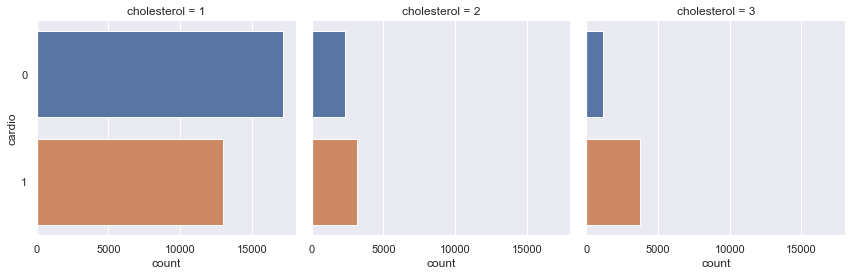

In [80]:
# breakdown of male cholesterol who have cardiovascular disease
sb.catplot(y = 'cardio', data = maleDF, col = 'cholesterol', kind = 'count', col_wrap = 3, height = 4)

###### Smoking vs presence of Cardiovascular disease

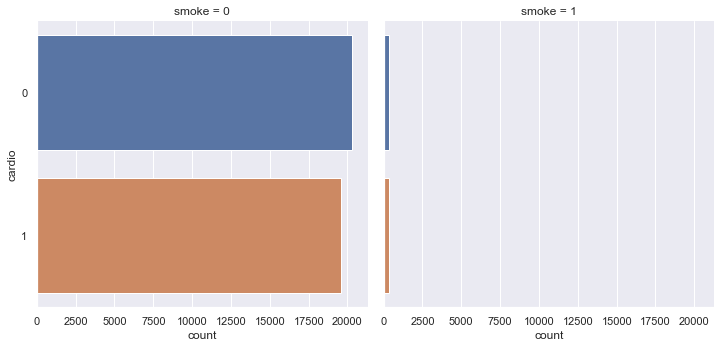

In [81]:
# males who have cardiovascular disease from smoking
sb.catplot(y = 'cardio', data = maleDF, col = 'smoke', kind = 'count', col_wrap = 3, height = 5)

Number of male non-smokers(0) vs smokers(1) surveyed :
0    39868
1      686
Name: smoke, dtype: int64


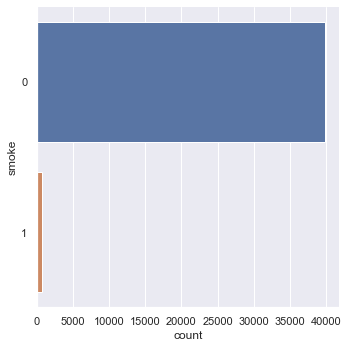

In [82]:
# Male Smokers in the Dataset
print("Number of male non-smokers(0) vs smokers(1) surveyed :")

# Smokers vs non-smokers
print(maleDF["smoke"].value_counts())
sb.catplot(y = "smoke", data = maleDF, kind = "count")

##### It may be seen initially that the correlation of smokers and cardiovascular disease for males is not significant. However, this could be due to the fact that only 686 males out of 40554 are smokers, which can be deemed insufficient sample data or an unequal comparison. 
##### What will be done: splitting the dataset into smokers and non-smokers and regrouping them with whether cardiovascular disease is present in the person

In [83]:
# Create a joint dataframe by concatenating the two variables
jointDF_male = pd.concat([maleSMOKE, maleCARDIO], axis = 1).reindex(maleSMOKE.index)
jointDF_male.describe()

,smoke,cardio
count,40554.000000,40554.000000
mean,0.016916,0.490802
std,0.128957,0.499922
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [85]:
#male; not smoker; no cardio disease

male_nonsmoker_nocardio = jointDF_male[(jointDF_male['smoke'] == 0) & (jointDF_male['cardio'] == 0 )]
male_nonsmoker_nocardio.describe()

,smoke,cardio
count,20284.0,20284.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [86]:
#male; not smoker; cardio disease present

male_nonsmoker_cardio = jointDF_male[(jointDF_male['smoke'] == 0) & (jointDF_male['cardio'] == 1 )]
male_nonsmoker_cardio.describe()

,smoke,cardio
count,19584.0,19584.0
mean,0.0,1.0
std,0.0,0.0
min,0.0,1.0
25%,0.0,1.0
50%,0.0,1.0
75%,0.0,1.0
max,0.0,1.0


In [87]:
male_nonsmoker = pd.concat([male_nonsmoker_nocardio, male_nonsmoker_cardio])
male_nonsmoker.describe()

,smoke,cardio
count,39868.0,39868.000000
mean,0.0,0.491221
std,0.0,0.499929
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,0.000000
75%,0.0,1.000000
max,0.0,1.000000


chart of non-smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present 
0    20284
1    19584
Name: cardio, dtype: int64


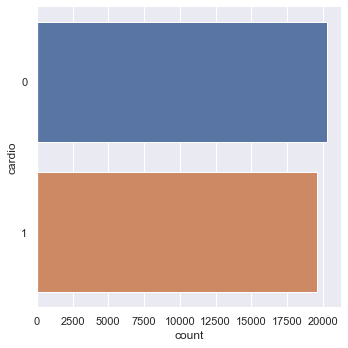

In [88]:
print("chart of non-smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present ")


print(male_nonsmoker["cardio"].value_counts())
sb.catplot(y = "cardio", data = male_nonsmoker, kind = "count")

In [89]:
#male; smoker; no cardio disease

male_smoker_nocardio = jointDF_male[(jointDF_male['smoke'] == 1) & (jointDF_male['cardio'] == 0 )]
male_smoker_nocardio.describe()

,smoke,cardio
count,366.0,366.0
mean,1.0,0.0
std,0.0,0.0
min,1.0,0.0
25%,1.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,0.0


In [90]:
#male; smoker; cardio disease present

male_smoker_cardio = jointDF_male[(jointDF_male['smoke'] == 1) & (jointDF_male['cardio'] == 1 )]
male_smoker_cardio.describe()

,smoke,cardio
count,320.0,320.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


In [91]:
male_smoker = pd.concat([male_smoker_nocardio, male_smoker_cardio])
male_smoker.describe()

,smoke,cardio
count,686.0,686.000000
mean,1.0,0.466472
std,0.0,0.499239
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,0.000000
75%,1.0,1.000000
max,1.0,1.000000


chart of smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present
0    366
1    320
Name: cardio, dtype: int64


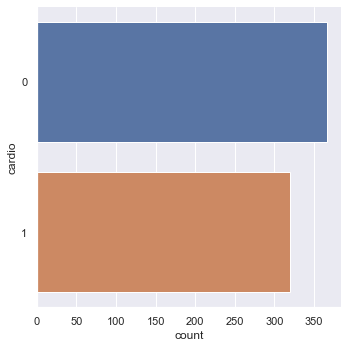

In [92]:
print("chart of smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present")

print(male_smoker["cardio"].value_counts())
sb.catplot(y = "cardio", data = male_smoker, kind = "count")

###### Results show that among smokers, the number of smokers who do not have cardiovascular disease is higher than smokers who have it. However, the small sample size may still be too small to come to a concrete conclusion

##### Alcohol Consumption vs presence of Cardiovascular disease

In [98]:
maleNoAlco = maleDF[(maleDF['alco'] == 0)]
maleNoAlco.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,39552.0,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.0,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000
mean,1.0,161.612839,71.907382,125.329971,80.736802,1.369362,1.228964,0.013779,0.0,0.801300,0.491075,53.542981,27.578760,95.601192
std,0.0,6.590912,11.827321,13.937021,8.333253,0.684569,0.579161,0.116575,0.0,0.399027,0.499927,6.626562,4.590192,9.417094
min,1.0,120.000000,30.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,30.000000,20.028842,73.333333
25%,1.0,157.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,50.000000,23.936062,93.333333
50%,1.0,162.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,54.000000,26.619343,93.333333
75%,1.0,166.000000,79.000000,130.000000,90.000000,2.000000,1.000000,0.000000,0.0,1.000000,1.000000,58.000000,30.483158,103.333333
max,1.0,198.000000,129.000000,163.000000,100.000000,3.000000,3.000000,1.000000,0.0,1.000000,1.000000,65.000000,41.091387,121.000000


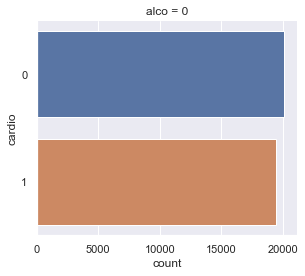

In [240]:
# breakdown of male consumption of alcohol vs presence of cardiovascular disease
sb.catplot(y = 'cardio', data = maleNoAlco, col = 'alco', kind = 'count', col_wrap = 3, height = 4)

In [99]:
maleNoAlco['cardio'].value_counts()

0    20129
1    19423
Name: cardio, dtype: int64

In [101]:
maleAlco = maleDF[(maleDF['alco'] == 1)]
maleAlco.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,1002.0,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.0,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,1.0,161.240519,75.517864,126.441118,81.410180,1.555888,1.274451,0.140719,1.0,0.831337,0.480040,52.763473,29.064084,96.420492
std,0.0,6.616136,13.209006,14.364981,8.693494,0.767321,0.594283,0.347905,0.0,0.374641,0.499851,6.666521,4.875632,9.729220
min,1.0,140.000000,40.000000,100.000000,60.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,39.000000,20.069204,73.333333
25%,1.0,157.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,48.000000,25.209201,91.666667
50%,1.0,160.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,54.000000,28.577961,93.333333
75%,1.0,165.000000,85.000000,140.000000,90.000000,2.000000,1.000000,0.000000,1.0,1.000000,1.000000,58.000000,32.744928,103.333333
max,1.0,185.000000,134.000000,162.000000,100.000000,3.000000,3.000000,1.000000,1.0,1.000000,1.000000,65.000000,41.091387,120.000000


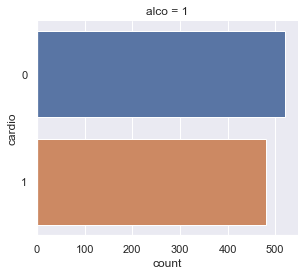

In [102]:
# breakdown of male consumption of alcohol vs presence of cardiovascular disease
sb.catplot(y = 'cardio', data = maleAlco, col = 'alco', kind = 'count', col_wrap = 3, height = 4)

In [103]:
maleAlco['cardio'].value_counts()

0    521
1    481
Name: cardio, dtype: int64

##### Male age (in years) vs presence of Cardiovascular disease

<AxesSubplot:xlabel='cardio', ylabel='years'>

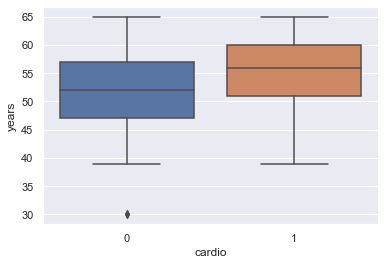

In [104]:
sb.boxplot(y =  maleDF['years'], x = maleDF['cardio'])

###### Glucose level vs presence of Cardiovascular disease (M)

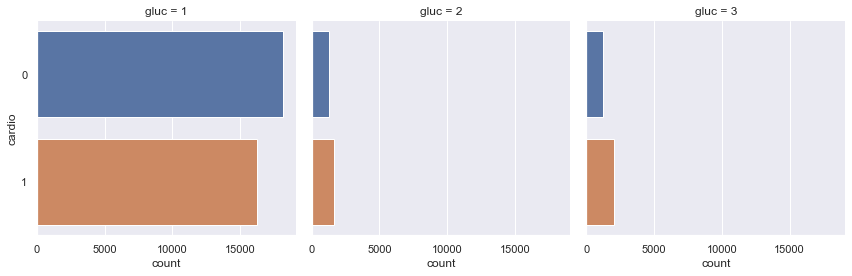

In [105]:
# breakdown of male cholesterol who have cardiovascular disease
sb.catplot(y = 'cardio', data = maleDF, col = 'gluc', kind = 'count', col_wrap = 3, height = 4)

In [106]:
maleGlucAboveNormal = maleDF[(maleDF['gluc'] > 1)]
maleGlucAboveNormal.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,6112.0,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000
mean,1.0,161.055301,74.812091,128.559391,82.240183,2.065609,2.526669,0.019961,0.032395,0.786649,0.600785,54.878109,28.888734,97.679919
std,0.0,6.509881,12.681050,14.535375,8.433686,0.854751,0.499329,0.139877,0.177062,0.409707,0.489777,6.396312,4.892237,9.619578
min,1.0,131.000000,37.000000,100.000000,60.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,39.000000,20.060954,73.333333
25%,1.0,156.000000,65.000000,120.000000,80.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,50.000000,24.801587,93.333333
50%,1.0,161.000000,73.000000,130.000000,80.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,56.000000,28.305995,96.666667
75%,1.0,165.000000,83.000000,140.000000,90.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,60.000000,32.416097,106.666667
max,1.0,198.000000,134.000000,162.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,41.091387,120.000000


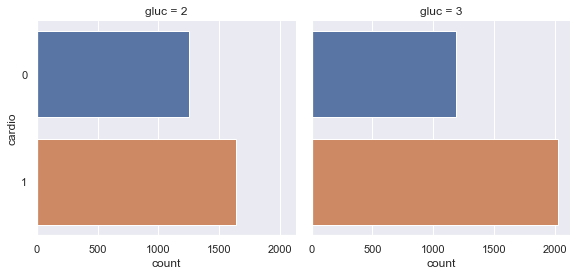

In [107]:
# breakdown of male glucose level above normal who have cardiovascular disease
sb.catplot(y = 'cardio', data = maleGlucAboveNormal, col = 'gluc', kind = 'count', col_wrap = 3, height = 4)

In [248]:
# Train Set : 30554 samples
malecardio_train = pd.DataFrame(maleCARDIO[:30544])
malesmoke_train = pd.DataFrame(maleSMOKE[:30544])
malebmi_train = pd.DataFrame(maleBMI[:30544])
malemap_train = pd.DataFrame(maleMAP[:30544])

# Test Set : 10000 samples
malecardio_test = pd.DataFrame(maleCARDIO[-10000:])
malesmoke_test = pd.DataFrame(maleSMOKE[-10000:])
malebmi_test = pd.DataFrame(maleBMI[-10000:])
malemap_test = pd.DataFrame(maleMAP[-10000:])

# Check the sample sizes
print("Train Set :", malecardio_train.shape, malesmoke_train.shape, malebmi_train.shape, malemap_train.shape)
print("Test Set  :", malecardio_test.shape, malesmoke_test.shape,  malebmi_test.shape, malemap_test.shape)

Train Set : (30544, 1) (30544, 1) (30544, 1) (30544, 1)
Test Set  : (10000, 1) (10000, 1) (10000, 1) (10000, 1)


In [249]:
type(malecardio_train["cardio"])

pandas.core.series.Series

#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [250]:
# Summary Statistics for Legendary Train
malecardio_train["cardio"].value_counts()

0    15544
1    15000
Name: cardio, dtype: int64

In [251]:
# Summary Statistics for Total Train
malecardio_train.describe()

,cardio
count,30544.000000
mean,0.491095
std,0.499929
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


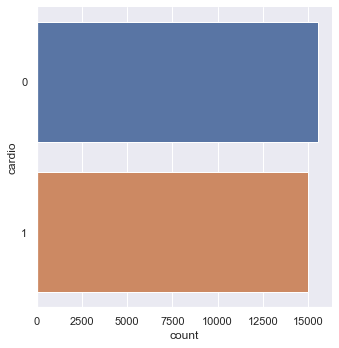

In [252]:
# Count Plot for Legendary Train
sb.catplot(y = "cardio", data = malecardio_train, kind = "count")

<AxesSubplot:>

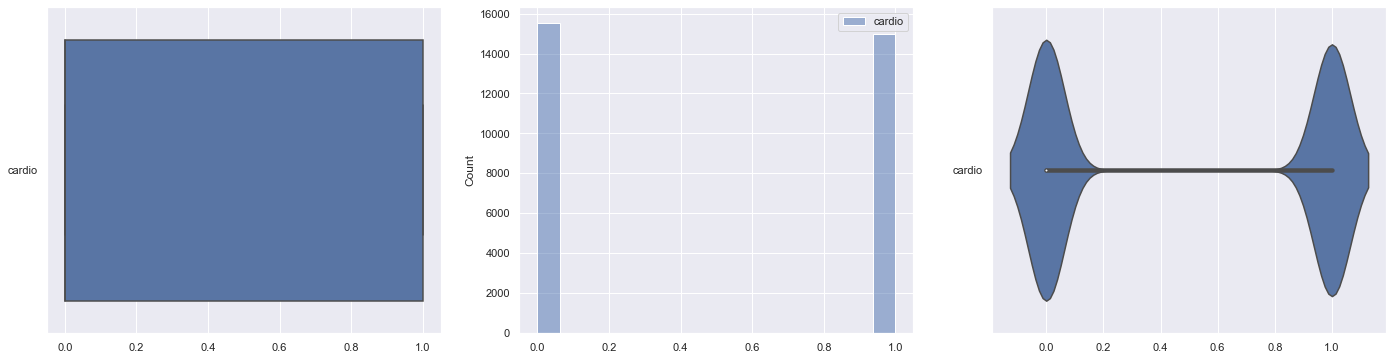

In [253]:
# Plot the distributions of Total Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = malecardio_train, orient = "h", ax = axes[0])
sb.histplot(data = malecardio_train, ax = axes[1])
sb.violinplot(data = malecardio_train, orient = "h", ax = axes[2])

# Boxplot for Male Cardio vs BMI

<AxesSubplot:xlabel='bmi', ylabel='cardio'>

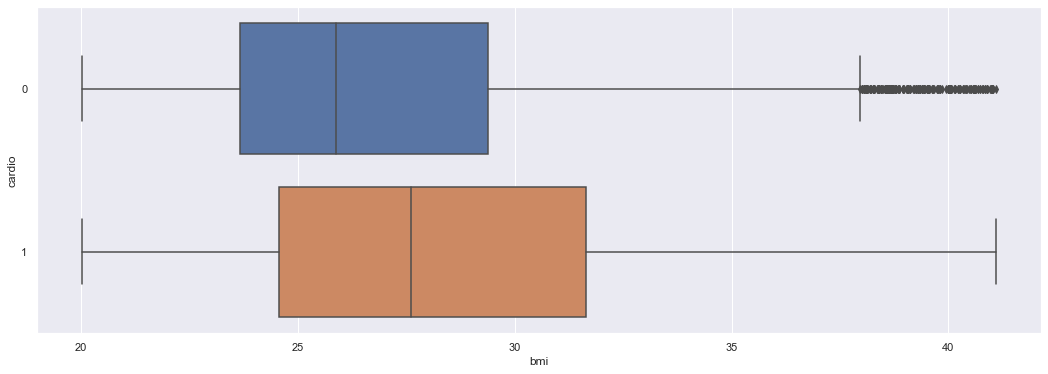

In [360]:
# Create a joint dataframe by concatenating cardiovascular disease vs bmi
trainDF = pd.concat([malecardio_train, malebmi_train], axis = 1).reindex(malecardio_train.index)

# Joint Boxplot of presence of cardiovascular disease vs bmi
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "bmi", y = "cardio", data = trainDF, orient = "h")

# Boxplot for Male Cardio vs MAP

<AxesSubplot:xlabel='MAP', ylabel='cardio'>

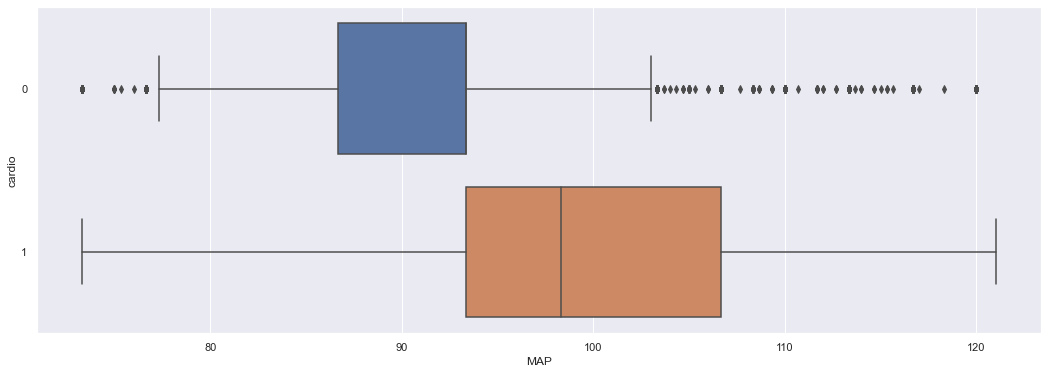

In [361]:
# Create a joint dataframe by concatenating presence of cardiovascular disease vs MAP
trainDF2 = pd.concat([malecardio_train, malemap_train], axis = 1).reindex(malecardio_train.index)

# Joint Boxplot of presence of cardiovascular disease vs MAP
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "MAP", y = "cardio", data = trainDF2, orient = "h")

## Female Plots

In [112]:
femaleDF = newheartdata[newheartdata['gender'] == 2]
femaleDF.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,24470.0,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000,24470.000000
mean,2.0,169.947895,77.257307,130.078872,100.551982,1.333633,1.210462,0.218880,0.106375,0.806906,0.505231,53.126277,26.754442,110.394279
std,0.0,7.228895,14.187636,146.186152,211.557292,0.653764,0.551493,0.413496,0.308323,0.394734,0.499983,6.937764,5.162752,149.916392
min,2.0,65.000000,10.000000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784,3.333333
25%,2.0,165.000000,68.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.781213,93.333333
50%,2.0,170.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,54.000000,25.910684,93.333333
75%,2.0,175.000000,85.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,29.043709,106.666667
max,2.0,207.000000,200.000000,14020.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,180.678074,6716.666667


In [113]:
femaleDF.drop(femaleDF[(femaleDF['ap_hi'] > femaleDF['ap_hi'].quantile(0.975)) | (femaleDF['ap_hi'] < femaleDF['ap_hi'].quantile(0.025))].index,inplace=True)
femaleDF.drop(femaleDF[(femaleDF['ap_lo'] > femaleDF['ap_lo'].quantile(0.975)) | (femaleDF['ap_lo'] < femaleDF['ap_lo'].quantile(0.025))].index,inplace=True)
femaleDF.drop(femaleDF[(femaleDF['bmi'] > femaleDF['bmi'].quantile(0.975)) | (femaleDF['bmi'] < femaleDF['bmi'].quantile(0.025))].index,inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [114]:
femaleDF.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,21500.0,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000
mean,2.0,170.025116,76.808688,127.487860,82.305070,1.323488,1.203256,0.214233,0.103023,0.806744,0.497116,53.119488,26.522601,97.366000
std,0.0,6.651682,12.074933,13.970136,7.571438,0.647340,0.544660,0.410298,0.303996,0.394861,0.500003,6.934840,3.562157,8.928679
min,2.0,125.000000,40.000000,100.000000,69.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000,19.921875,79.333333
25%,2.0,166.000000,68.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,93.333333
50%,2.0,170.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,25.909457,93.333333
75%,2.0,174.000000,85.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,28.731747,103.333333
max,2.0,198.000000,128.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,36.934160,123.333333


New femaleDF count = 21500

In [115]:
femaleSMOKE = pd.DataFrame(femaleDF['smoke'])
femaleSMOKE.describe()

,smoke
count,21500.000000
mean,0.214233
std,0.410298
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [116]:
femaleCARDIO = pd.DataFrame(femaleDF['cardio'])
femaleCARDIO.describe()

,cardio
count,21500.000000
mean,0.497116
std,0.500003
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [117]:
femaleBMI = pd.DataFrame(femaleDF['bmi'])
femaleBMI.describe()

,bmi
count,21500.000000
mean,26.522601
std,3.562157
min,19.921875
25%,23.875115
50%,25.909457
75%,28.731747
max,36.934160


In [118]:
femaleMAP = pd.DataFrame(femaleDF['MAP'])
femaleMAP.describe()

,MAP
count,21500.000000
mean,97.366000
std,8.928679
min,79.333333
25%,93.333333
50%,93.333333
75%,103.333333
max,123.333333


## Female Analysis

In [128]:
# Create a joint dataframe by concatenating the two variables
jointDF_female = pd.concat([femaleSMOKE, femaleCARDIO], axis = 1).reindex(femaleSMOKE.index)
jointDF_female.describe()

,smoke,cardio
count,21500.000000,21500.000000
mean,0.214233,0.497116
std,0.410298,0.500003
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [129]:
#female; not smoker; no cardio disease

female_nonsmoker_nocardio = jointDF_female[(jointDF_female['smoke'] == 0) & (jointDF_female['cardio'] == 0 )]
female_nonsmoker_nocardio.describe()

,smoke,cardio
count,8353.0,8353.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [130]:
#female; not smoker; cardio disease present

female_nonsmoker_cardio = jointDF_female[(jointDF_female['smoke'] == 0) & (jointDF_female['cardio'] == 1 )]
female_nonsmoker_cardio.describe()

,smoke,cardio
count,8541.0,8541.0
mean,0.0,1.0
std,0.0,0.0
min,0.0,1.0
25%,0.0,1.0
50%,0.0,1.0
75%,0.0,1.0
max,0.0,1.0


In [131]:
female_nonsmoker = pd.concat([female_nonsmoker_nocardio, female_nonsmoker_cardio])
female_nonsmoker.describe()

,smoke,cardio
count,16894.0,16894.000000
mean,0.0,0.505564
std,0.0,0.499984
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,1.000000
75%,0.0,1.000000
max,0.0,1.000000


chart of female non-smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present 
1    8541
0    8353
Name: cardio, dtype: int64


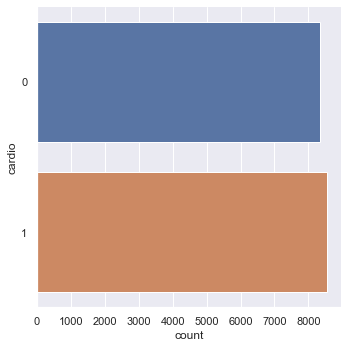

In [266]:
print("chart of female non-smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present ")


print(female_nonsmoker["cardio"].value_counts())
sb.catplot(y = "cardio", data = female_nonsmoker, kind = "count")

In [127]:
#female; smoker; no cardio disease

female_smoker_nocardio = jointDF_female[(jointDF_female['smoke'] == 1) & (jointDF_female['cardio'] == 0 )]
female_smoker_nocardio.describe()

,smoke,cardio
count,2459.0,2459.0
mean,1.0,0.0
std,0.0,0.0
min,1.0,0.0
25%,1.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,0.0


In [133]:
#female; smoker; cardio disease present

female_smoker_cardio = jointDF_female[(jointDF_female['smoke'] == 1) & (jointDF_female['cardio'] == 1 )]
female_smoker_cardio.describe()

,smoke,cardio
count,2147.0,2147.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


In [134]:
female_smoker = pd.concat([female_smoker_nocardio, female_smoker_cardio])
female_smoker.describe()

,smoke,cardio
count,4606.0,4606.000000
mean,1.0,0.466131
std,0.0,0.498906
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,0.000000
75%,1.0,1.000000
max,1.0,1.000000


In [135]:
female_smoker = pd.concat([female_smoker_nocardio, female_smoker_cardio])
female_smoker.describe()

,smoke,cardio
count,4606.0,4606.000000
mean,1.0,0.466131
std,0.0,0.498906
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,0.000000
75%,1.0,1.000000
max,1.0,1.000000


chart of female smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present
0    2459
1    2147
Name: cardio, dtype: int64


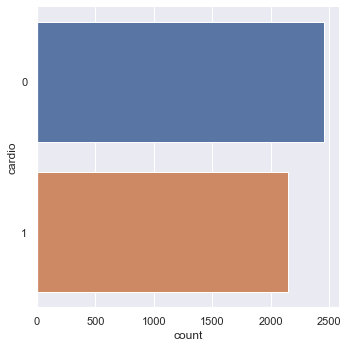

In [136]:
print("chart of female smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present")

print(female_smoker["cardio"].value_counts())
sb.catplot(y = "cardio", data = female_smoker, kind = "count")

##### Female age (in years) vs presence of Cardiovascular disease


<AxesSubplot:xlabel='cardio', ylabel='years'>

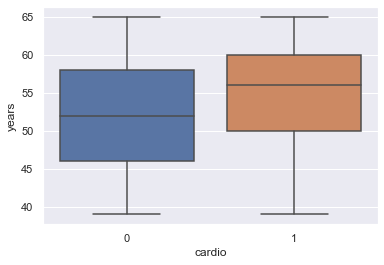

In [137]:
sb.boxplot(y =  femaleDF['years'], x = femaleDF['cardio'])

###### Alcohol Consumption vs presence of Cardiovascular disease (F)

In [138]:
femaleNoAlco = femaleDF[(femaleDF['alco'] == 0)]
femaleNoAlco.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,19285.0,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.0,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000
mean,2.0,169.955198,76.643801,127.336531,82.212341,1.315271,1.202074,0.163910,0.0,0.801400,0.500596,53.197252,26.487323,97.253738
std,0.0,6.648879,12.037961,13.863650,7.502317,0.643653,0.545080,0.370203,0.0,0.398956,0.500013,6.947247,3.552949,8.849534
min,2.0,125.000000,40.000000,100.000000,69.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,39.000000,19.921875,79.333333
25%,2.0,165.000000,68.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,48.000000,23.875115,93.333333
50%,2.0,170.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,54.000000,25.854639,93.333333
75%,2.0,174.000000,84.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,59.000000,28.713211,103.333333
max,2.0,198.000000,128.000000,170.000000,100.000000,3.000000,3.000000,1.000000,0.0,1.000000,1.000000,65.000000,36.934160,123.333333


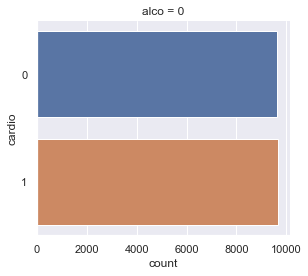

In [139]:
# breakdown of male consumption of alcohol vs presence of cardiovascular disease
sb.catplot(y = 'cardio', data = femaleNoAlco, col = 'alco', kind = 'count', col_wrap = 3, height = 4)

In [145]:
femaleAlco['cardio'].value_counts()

0    1181
1    1034
Name: cardio, dtype: int64

In [140]:
femaleAlco = femaleDF[(femaleDF['alco'] == 1)]
femaleAlco.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,2215.0,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.0,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,2.0,170.633860,78.244289,128.805418,83.112415,1.395034,1.213544,0.652370,1.0,0.853273,0.466817,52.442438,26.829748,98.343416
std,0.0,6.646516,12.301871,14.803121,8.105587,0.674529,0.540999,0.476325,0.0,0.353913,0.499010,6.789865,3.627688,9.536622
min,2.0,150.000000,49.000000,100.000000,70.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,39.000000,19.943213,80.000000
25%,2.0,167.000000,69.000000,120.000000,80.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,47.000000,24.092971,93.333333
50%,2.0,170.000000,77.000000,120.000000,80.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,53.000000,26.395803,96.666667
75%,2.0,175.000000,86.000000,140.000000,90.000000,2.000000,1.000000,1.000000,1.0,1.000000,1.000000,58.000000,29.320988,106.666667
max,2.0,193.000000,121.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.0,1.000000,1.000000,65.000000,36.844240,123.333333


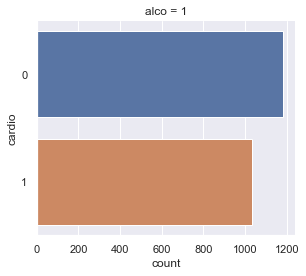

In [141]:
# breakdown of female consumption of alcohol vs presence of cardiovascular disease
sb.catplot(y = 'cardio', data = femaleAlco, col = 'alco', kind = 'count', col_wrap = 3, height = 4)

In [147]:
femaleAlco['cardio'].value_counts()

0    1181
1    1034
Name: cardio, dtype: int64

###### Glucose level vs presence of Cardiovascular disease (F)

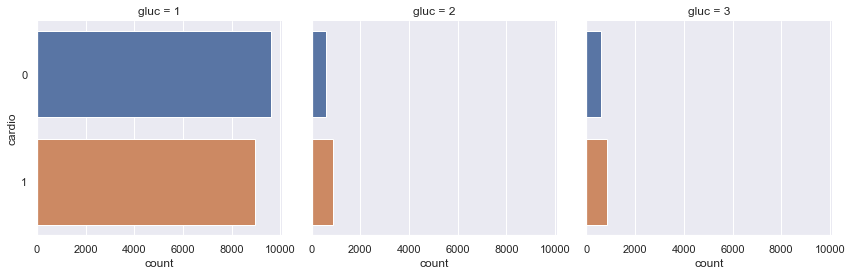

In [148]:
# breakdown of female glucose level who have cardiovascular disease
sb.catplot(y = 'cardio', data = femaleDF, col = 'gluc', kind = 'count', col_wrap = 3, height = 4)

In [149]:
femaleGlucAboveNormal = femaleDF[(femaleDF['gluc'] > 1)]
femaleGlucAboveNormal.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,2922.0,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,2.0,170.444901,80.646167,130.556468,83.592402,1.930185,2.495551,0.217317,0.114648,0.810062,0.588980,54.614990,27.700457,99.247091
std,0.0,6.642524,12.868649,14.633222,8.070461,0.857885,0.500066,0.412491,0.318651,0.392319,0.492103,6.563306,3.720111,9.450316
min,2.0,140.000000,49.000000,100.000000,69.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,39.000000,20.047446,80.000000
25%,2.0,166.000000,71.000000,120.000000,80.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,50.000000,24.801587,93.333333
50%,2.0,170.000000,80.000000,130.000000,80.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,56.000000,27.390919,96.666667
75%,2.0,175.000000,90.000000,140.000000,90.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,60.000000,30.387144,106.666667
max,2.0,198.000000,125.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,36.932124,123.333333


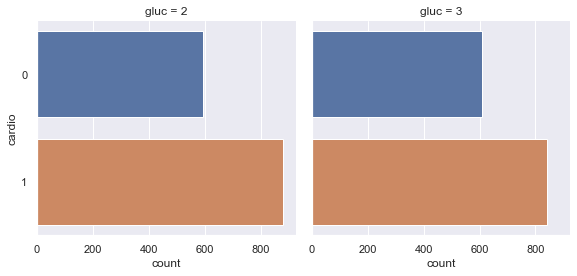

In [144]:
# breakdown of female glucose level above normal who have cardiovascular disease
sb.catplot(y = 'cardio', data = femaleGlucAboveNormal, col = 'gluc', kind = 'count', col_wrap = 3, height = 4)

#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [151]:
# Train Set : 16125 samples
femalecardio_train = pd.DataFrame(femaleCARDIO[:16125])
femalesmoke_train = pd.DataFrame(femaleSMOKE[:16125])
femalebmi_train = pd.DataFrame(femaleBMI[:16125])
femalemap_train = pd.DataFrame(femaleMAP[:16125])

# Test Set : 5375 samples
femalecardio_test = pd.DataFrame(femaleCARDIO[-5375:])
femalesmoke_test = pd.DataFrame(femaleSMOKE[-5375:])
femalebmi_test = pd.DataFrame(femaleBMI[-5375:])
femalemap_test = pd.DataFrame(femaleMAP[-5375:])

# Check the sample sizes
print("Train Set :", femalecardio_train.shape, femalesmoke_train.shape, femalebmi_train.shape, femalemap_train.shape)
print("Test Set  :", femalecardio_test.shape, femalesmoke_test.shape,  femalebmi_test.shape, femalemap_test.shape)

Train Set : (16125, 1) (16125, 1) (16125, 1) (16125, 1)
Test Set  : (5375, 1) (5375, 1) (5375, 1) (5375, 1)


In [152]:
type(femalecardio_train["cardio"])

pandas.core.series.Series

In [275]:
# Summary Statistics for Legendary Train
femalecardio_train["cardio"].value_counts()

0    8152
1    7973
Name: cardio, dtype: int64

In [276]:
# Summary Statistics for Total Train
femalecardio_train.describe()

,cardio
count,16125.000000
mean,0.494450
std,0.499985
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


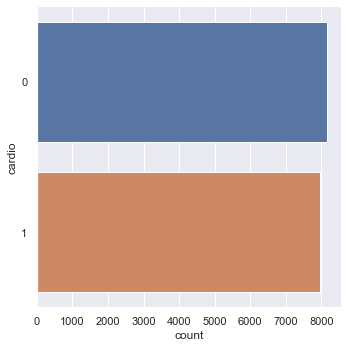

In [277]:
# Count Plot for Legendary Train
sb.catplot(y = "cardio", data = femalecardio_train, kind = "count")

<AxesSubplot:>

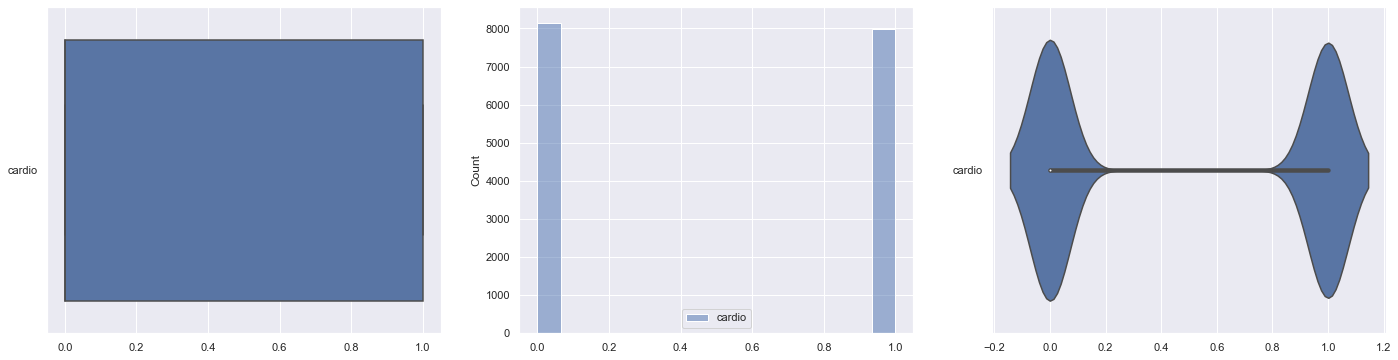

In [278]:
# Plot the distributions of Total Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = femalecardio_train, orient = "h", ax = axes[0])
sb.histplot(data = femalecardio_train, ax = axes[1])
sb.violinplot(data = femalecardio_train, orient = "h", ax = axes[2])

# Boxplot for Female Cardio vs BMI

<AxesSubplot:xlabel='bmi', ylabel='cardio'>

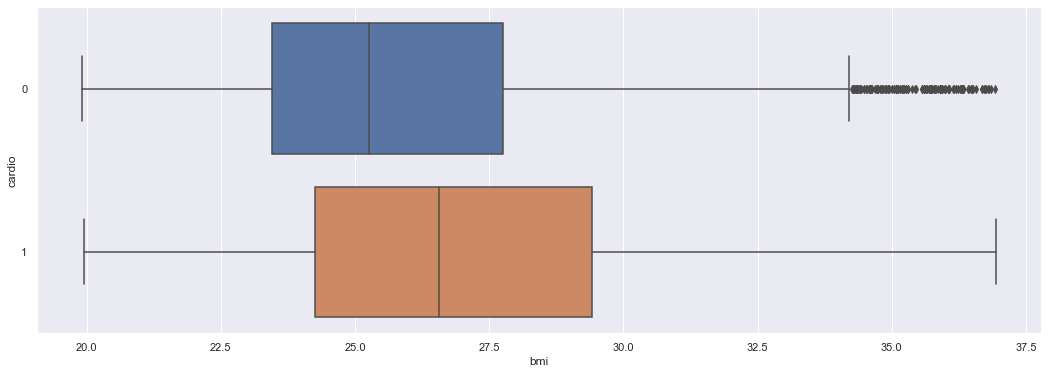

In [279]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF3 = pd.concat([femalecardio_train, femalebmi_train], axis = 1).reindex(femalecardio_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "bmi", y = "cardio", data = trainDF3, orient = "h")

# Boxplot for Female Cardio vs MAP

<AxesSubplot:xlabel='MAP', ylabel='cardio'>

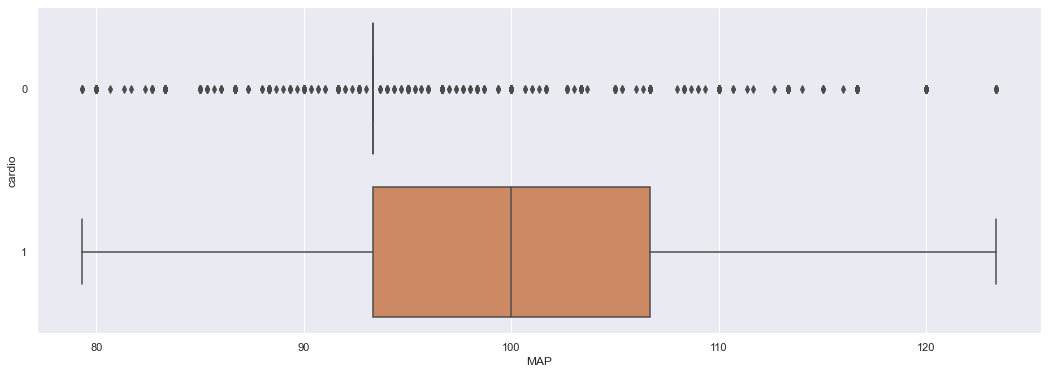

In [280]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF4 = pd.concat([femalecardio_train, femalemap_train], axis = 1).reindex(femalecardio_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "MAP", y = "cardio", data = trainDF4, orient = "h")

# Classification Tree for Male

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7248

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7287428571428571



<AxesSubplot:>

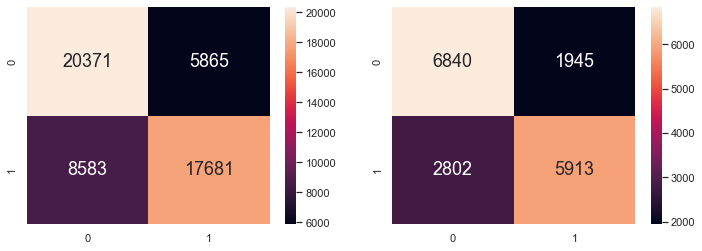

In [298]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["cholesterol", "smoke", "gluc", "ap_lo", "alco", "active","gender", "ap_hi", "weight", "height"]

# Recall the Legendary-Total Dataset
y = pd.DataFrame(newheartdata['cardio'])   # Response
X = pd.DataFrame(newheartdata[predictors])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
#capital X denotes variables in a matrix, while small letter y denotes a vector

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

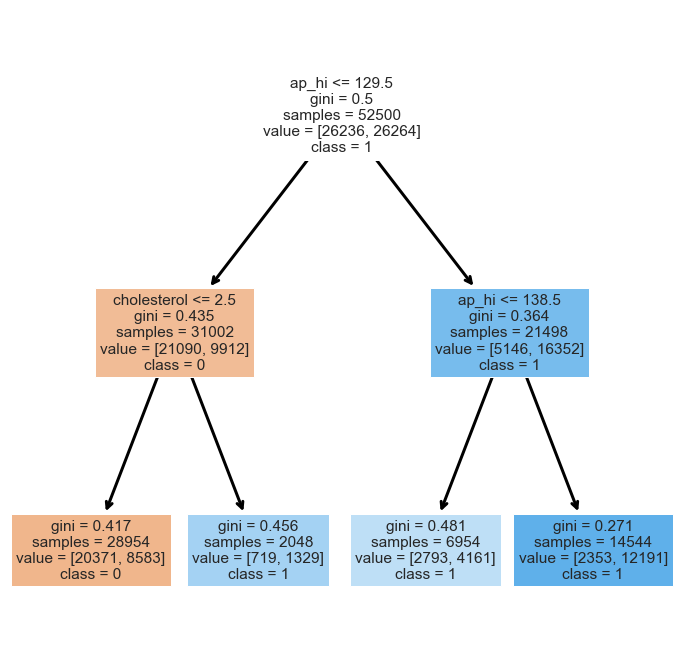

In [299]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Classification Tree for Female

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7195658914728682

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7153488372093023



<AxesSubplot:>

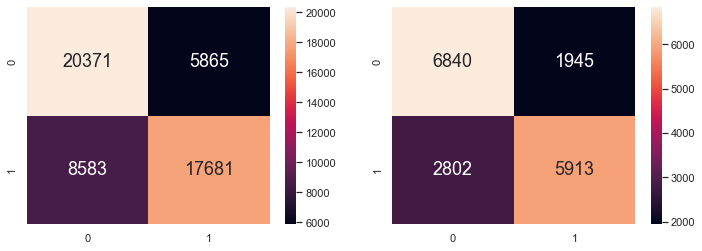

In [300]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["cholesterol", "smoke", "gluc", "ap_lo", "alco", "active","gender", "ap_hi", "weight", "height"]

# Recall the Legendary-Total Dataset
b = pd.DataFrame(femaleDF['cardio'])   # Response
A = pd.DataFrame(femaleDF[predictors])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.25) 
#capital X denotes variables in a matrix, while small letter y denotes a vector

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(A_train, b_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
b_train_pred = dectree.predict(A_train)
b_test_pred = dectree.predict(A_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(A_train, b_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(A_test, b_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

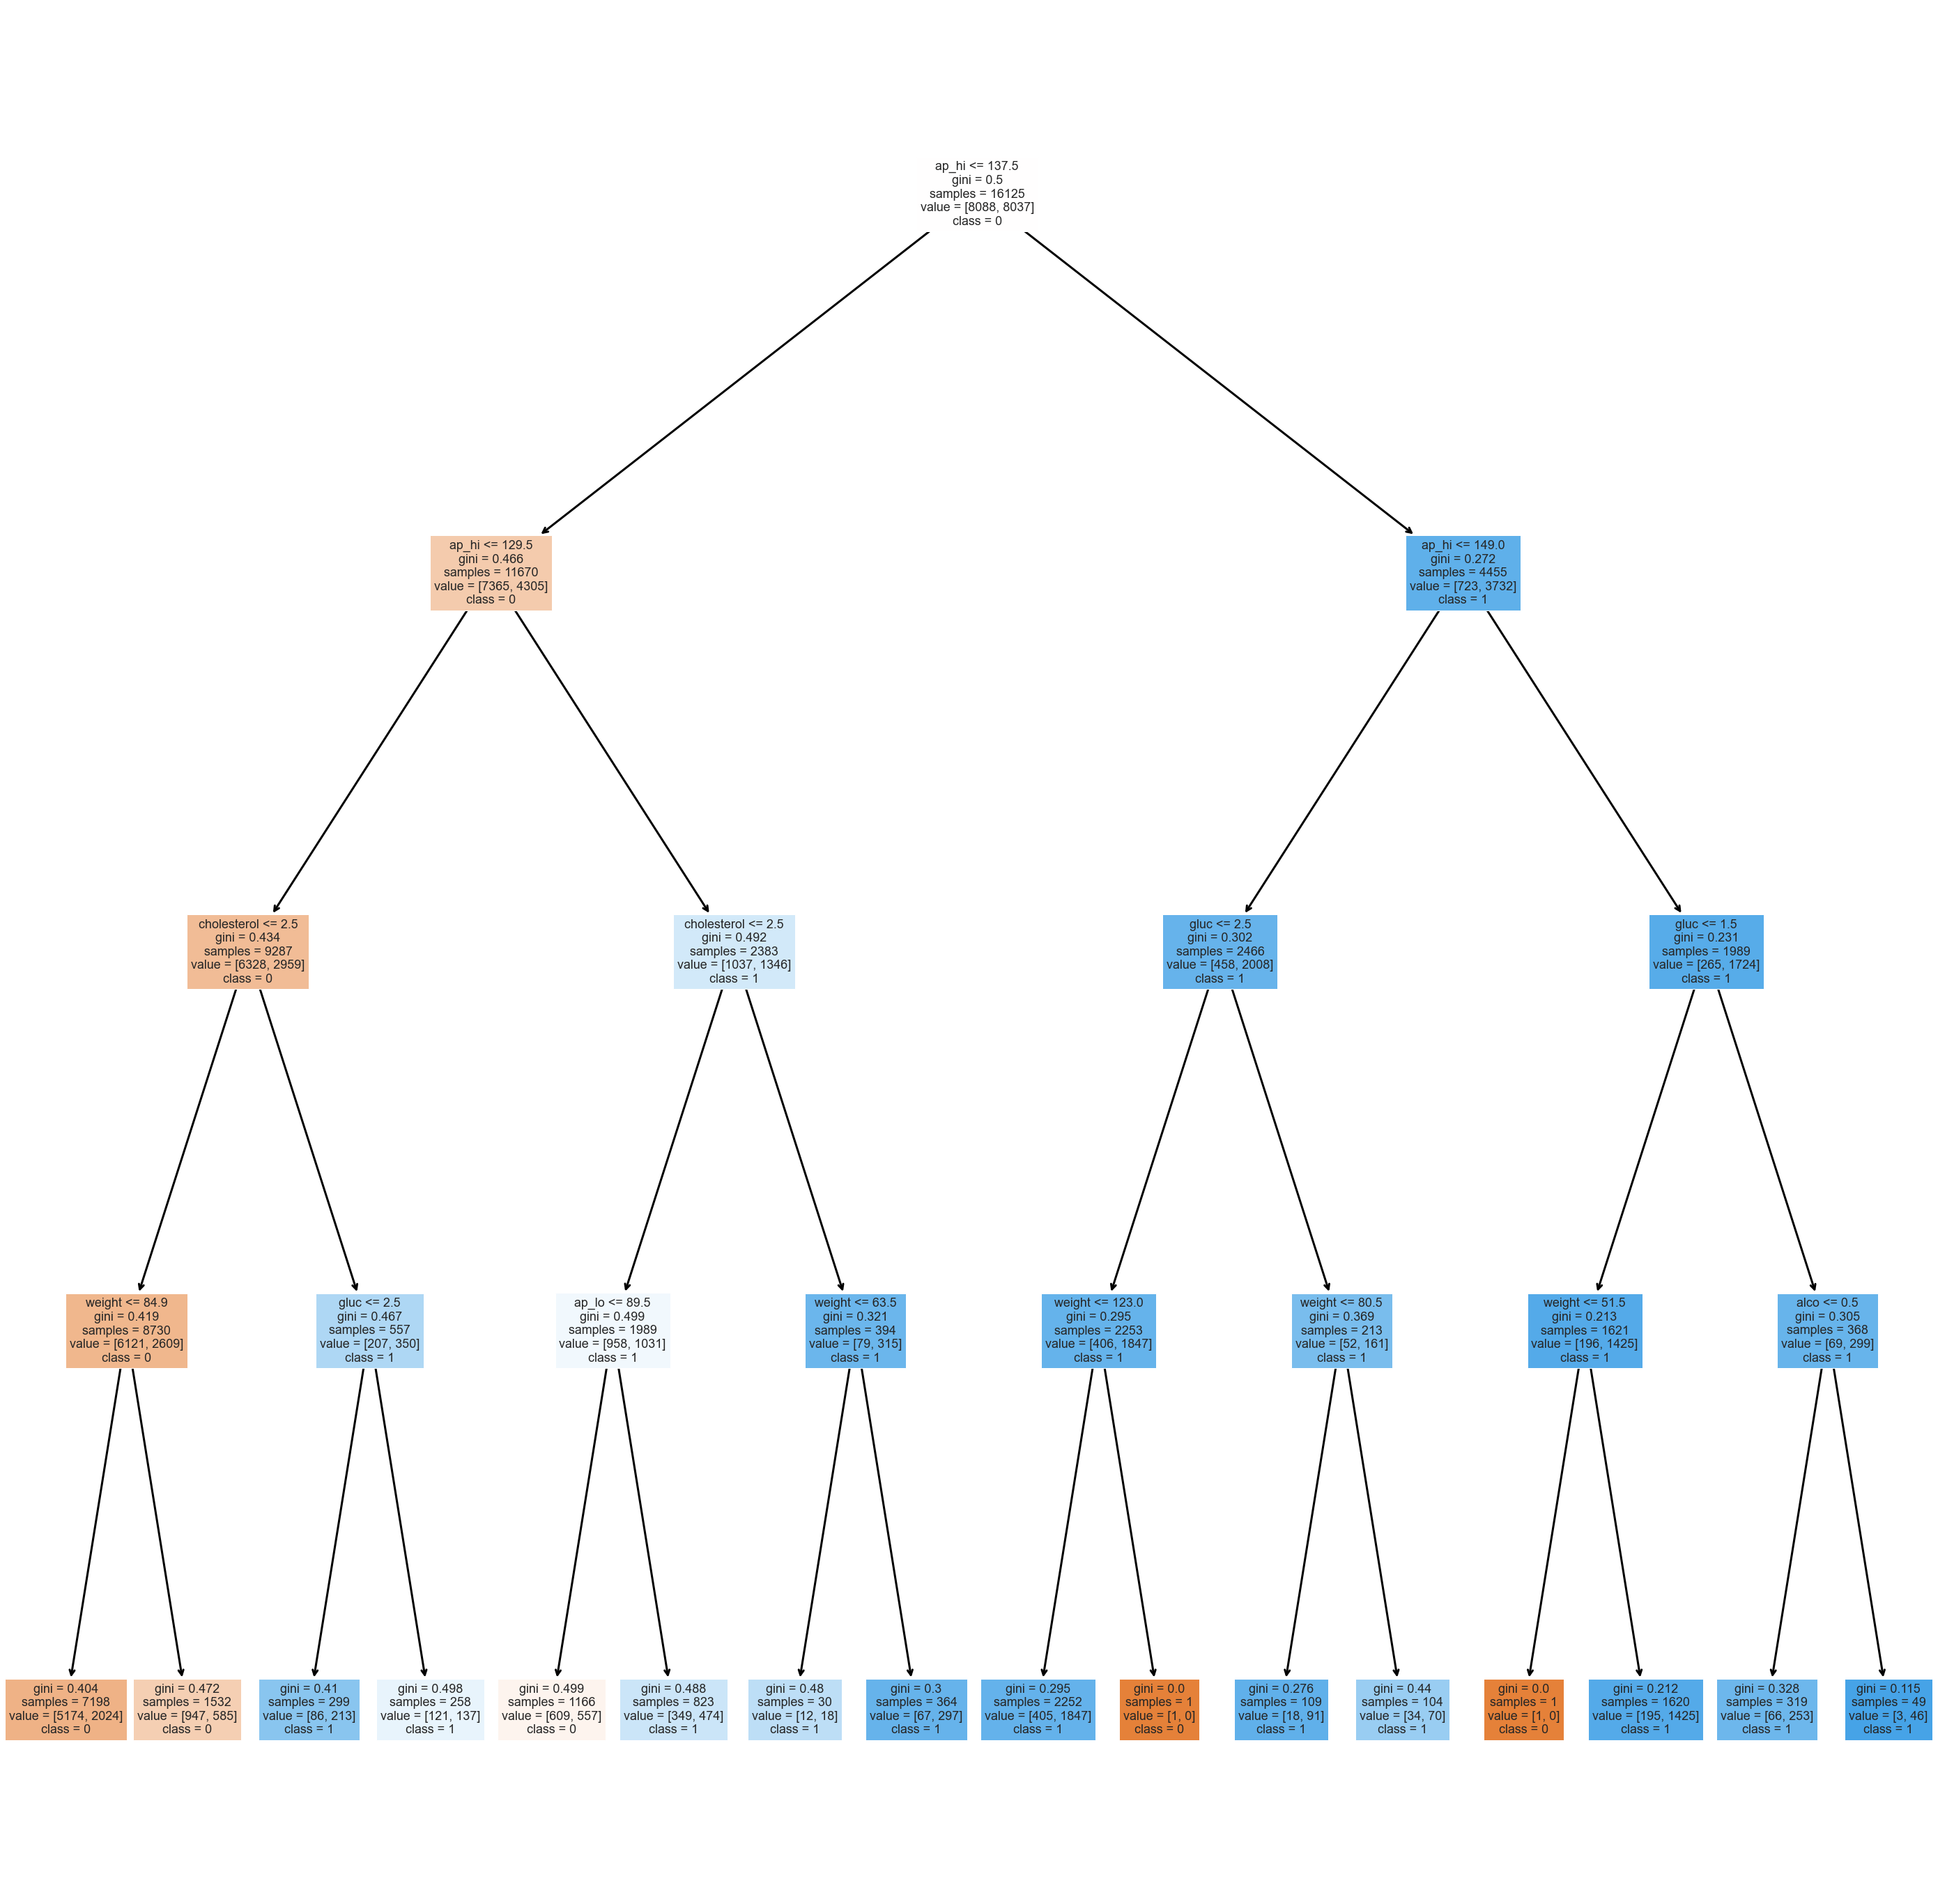

In [301]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(50, 50))
out = plot_tree(dectree, 
          feature_names = A_train.columns,
          class_names = [str(a) for a in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Logistic Regression for Males

In [302]:
feature_cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
                'smoke','alco', 'active', 'bmi', 'MAP']

MaleA = maleDF[feature_cols]
Maleb = maleDF.cardio

In [303]:
from sklearn.model_selection import train_test_split
MaleA_train, MaleA_test, Maleb_train, Maleb_test = train_test_split(MaleA, Maleb,
                                                                   test_size = 0.25, random_state = 0)

In [304]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(MaleA_train, Maleb_train)

Maleb_pred = logreg.predict(MaleA_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(MaleA_test, Maleb_test)))

Accuracy of logistic regression classifier on test set: 0.71


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [305]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Maleb_test, Maleb_pred)
cnf_matrix

array([[4055, 1059],
       [1853, 3172]], dtype=int64)

Text(0.5, 257.44, 'Predicted Cardio')

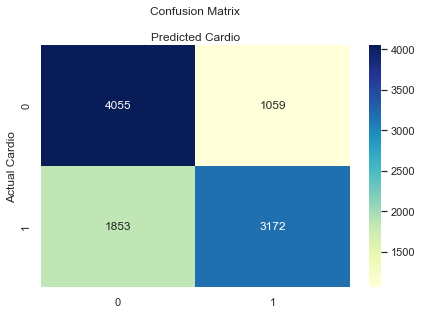

In [306]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Cardio')
plt.xlabel('Predicted Cardio')

In [307]:
print("Accuracy:",metrics.accuracy_score(Maleb_test, Maleb_pred))
print("Precision:",metrics.precision_score(Maleb_test, Maleb_pred))
print("Recall:",metrics.recall_score(Maleb_test, Maleb_pred))

Accuracy: 0.7127921885787553
Precision: 0.7497045615693689
Recall: 0.6312437810945274


# Logistic Regression for Females

In [308]:
feature_cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc'
                , 'alco', 'active', 'bmi', 'MAP']
FemaleA = femaleDF[feature_cols]
Femaleb = femaleDF.cardio

In [309]:
from sklearn.model_selection import train_test_split
#a = x, b = y
FemaleA_train, FemaleA_test, Femaleb_train, Femaleb_test = train_test_split(FemaleA,Femaleb,test_size = 0.25, 
                                                    random_state = 0)

In [310]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(FemaleA_train, Femaleb_train)

Femaleb_pred = logreg.predict(FemaleA_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(FemaleA_test, Femaleb_test)))

Accuracy of logistic regression classifier on test set: 0.72


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [311]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Femaleb_test, Femaleb_pred)
cnf_matrix

array([[2148,  560],
       [ 953, 1714]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

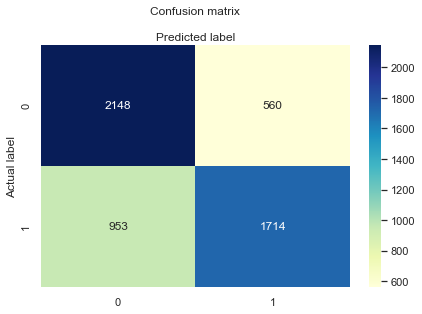

In [312]:
class_names = ['Yes', 'No']
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [313]:
print("Accuracy:",metrics.accuracy_score(Femaleb_test, Femaleb_pred))
print("Precision:",metrics.precision_score(Femaleb_test, Femaleb_pred))
print("Recall:",metrics.recall_score(Femaleb_test, Femaleb_pred))

Accuracy: 0.7185116279069768
Precision: 0.7537379067722075
Recall: 0.6426696662917135


## Random Forest Classifier

In [314]:
X = maleDF.drop(columns = ['cardio'])
Y = maleCARDIO

In [315]:
X

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,years,bmi,MAP
1,1,156,85.0,140,90,3,1,0,0,1,55,34.927679,106.666667
2,1,165,64.0,130,70,3,1,0,0,0,52,23.507805,90.000000
4,1,156,56.0,100,60,1,1,0,0,0,48,23.011177,73.333333
5,1,151,67.0,120,80,2,2,0,0,0,60,29.384676,93.333333
6,1,157,93.0,130,80,3,1,0,0,1,61,37.729725,96.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69991,1,159,72.0,130,90,2,2,0,0,1,56,28.479886,103.333333
69993,1,172,70.0,130,90,1,1,0,0,1,54,23.661439,103.333333
69994,1,165,80.0,150,80,1,1,0,0,1,58,29.384757,103.333333
69998,1,163,72.0,135,80,1,2,0,0,0,61,27.099251,98.333333


In [316]:
Y

,cardio
1,1
2,1
4,0
5,0
6,0
...,...
69991,0
69993,1
69994,1
69998,1


In [317]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [318]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Temp/ipykernel_10236/4251836313.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=10, random_state=0)

In [319]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [320]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.6836966170233751